In [10]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import yfinance as yf
from scipy import stats

In [2]:
aapl = yf.download('AAPL')
# Log Prix
P_aapl = np.log(aapl['Adj Close'])
# Log Rendements
R_aapl = P_aapl.diff().dropna()
t = len(R_aapl)
R_aapl.head()

[*********************100%***********************]  1 of 1 completed


Date
1980-12-15   -0.053581
1980-12-16   -0.076231
1980-12-17    0.024450
1980-12-18    0.028580
1980-12-19    0.059239
Name: Adj Close, dtype: float64

In [303]:
def chiarella(r, p, m, v, kappa,kappa3, beta, gamma, alpha, g, sigma_r, sigma_v):
    epsilon = np.random.normal(0, sigma_r)
    new_r = kappa*(v - p)+ kappa3*(v - p)**3 + beta*np.tanh(gamma*m)+epsilon
    new_m = (1 - alpha)*m + alpha*r
    new_v = v + g + np.random.normal(0,sigma_v)
    return (new_r, p+new_r, new_m, new_v)

def chiarella_t(t, r0, p0, m0, v0, kappa,kappa3, beta, gamma, alpha, g, sigma_r, sigma_v):
    r_df, p_df, m_df, v_df = [],[],[],[]
    r, p, m, v = r0, p0, m0, v0
    for i in range(t):
        r_df.append(r)
        p_df.append(p)
        m_df.append(m)
        v_df.append(v)
        r, p, m, v = chiarella(r, p, m, v, kappa,kappa3, beta, gamma, alpha, g, sigma_r, sigma_v)
    return r_df, p_df, m_df, v_df

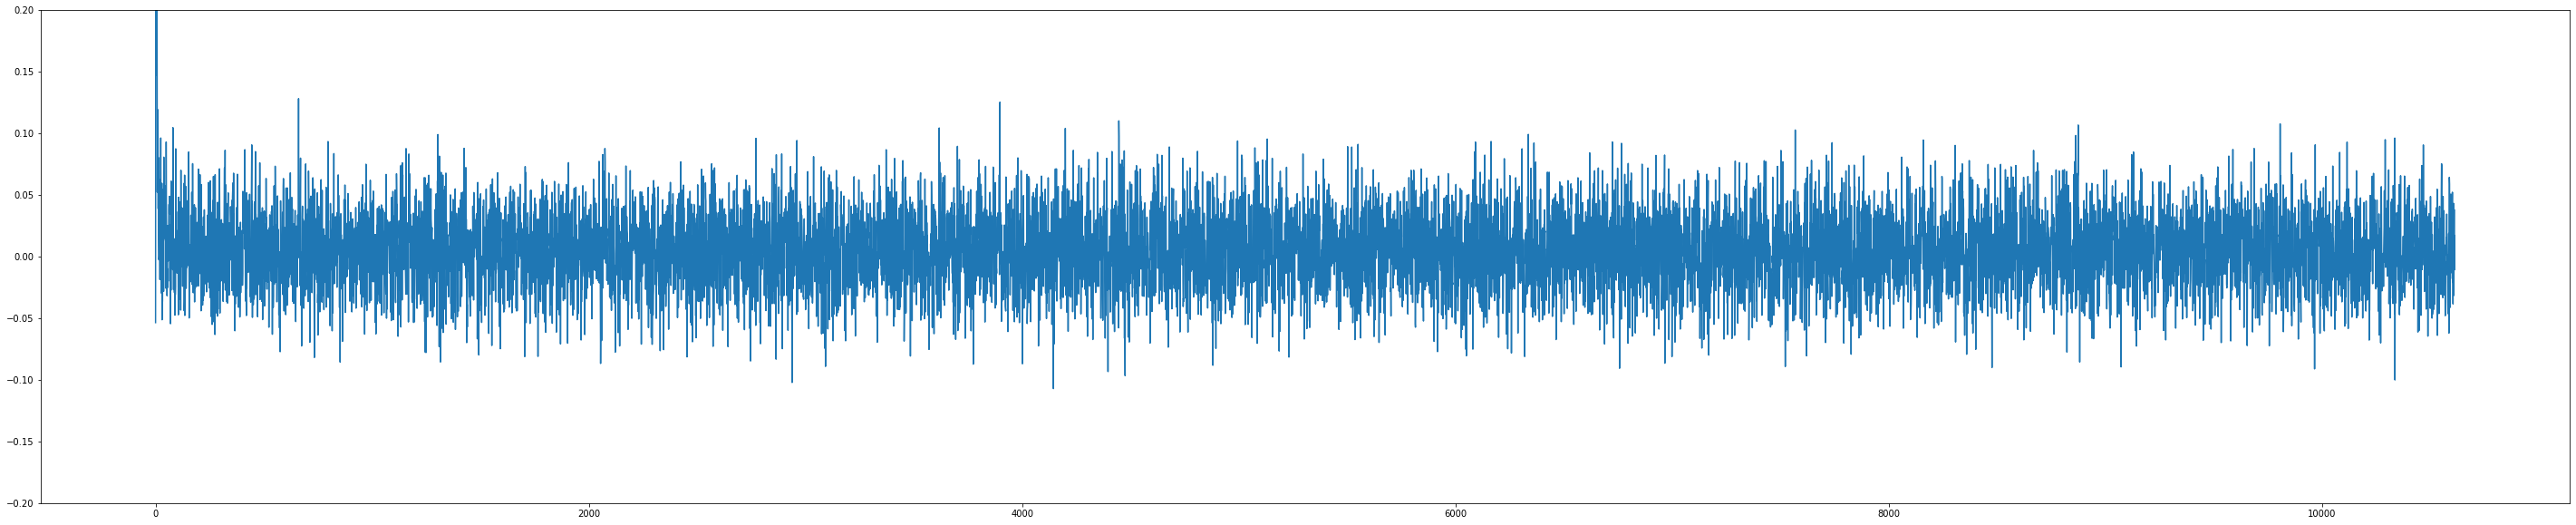

In [326]:
r0 = R_aapl.iloc[0]
p0 = P_aapl.iloc[0]
m0 = -5
v0 = P_aapl.mean()
kappa = 0.08
kappa3 = 0.01
beta = 0.04
gamma = 10
alpha = 0.1
g = 0.005
sigma_r = 0.03
sigma_v = 0.02

r, p, m, v = chiarella_t(t, r0, p0, m0, v0, kappa,kappa3, beta, gamma, alpha, g, sigma_r, sigma_v)
plt.figure(figsize=(50,10))
plt.ylim((-0.2,0.2))
plt.plot(r)
plt.show()

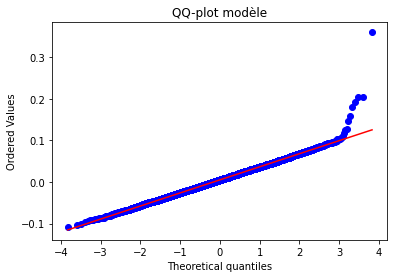

In [327]:
stats.probplot(r,plot=plt)
plt.title('QQ-plot modèle')
plt.show()

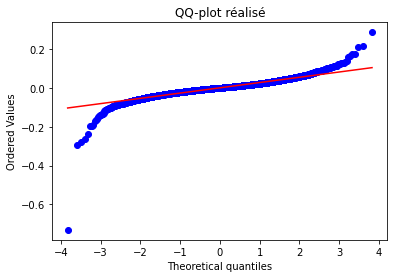

In [328]:
stats.probplot(R_aapl,plot=plt)
plt.title('QQ-plot réalisé')
plt.show()

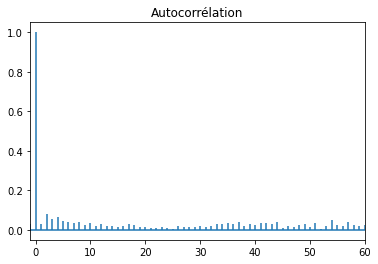

In [329]:
#plt.figure(figsize=(50,10))
plt.acorr(r,maxlags = 100)
plt.title('Autocorrélation')
plt.xlim((-1,60))
plt.show()

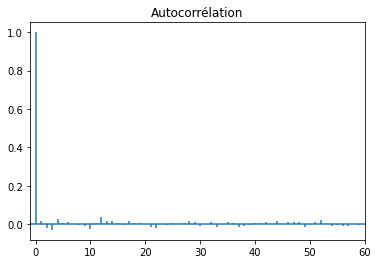

In [330]:
plt.acorr(R_aapl,maxlags = 100)
plt.title('Autocorrélation')
plt.xlim((-1,60))
plt.show()

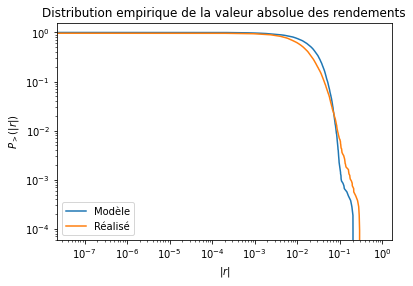

In [331]:
from statsmodels.distributions.empirical_distribution import ECDF

# ECDF données intraday
ecdf = ECDF((np.abs(r)))
ecdf_aapl = ECDF((np.abs(R_aapl)))
plt.plot(ecdf.x,1-ecdf.y,label='Modèle')
plt.plot(ecdf_aapl.x, 1-ecdf_aapl.y, label = 'Réalisé')
plt.yscale('log')
plt.xscale('log')
plt.ylabel('$P_{>}(|r|)$')
plt.xlabel('$|r|$')
plt.legend()
plt.title('Distribution empirique de la valeur absolue des rendements')
plt.show()

Distribution de |r| pas convaincante

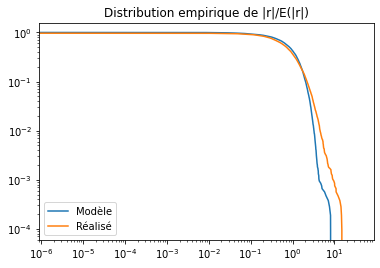

In [332]:
x = np.abs(r)/np.mean(np.abs(r))
ecdf_x = ECDF(x)
plt.plot(ecdf_x.x,1-ecdf_x.y, label='Modèle')
x_aapl = np.abs(R_aapl)/np.mean(np.abs(R_aapl))
ecdf_x_aapl = ECDF(x_aapl)
plt.plot(ecdf_x_aapl.x,1-ecdf_x_aapl.y, label='Réalisé')
plt.xscale('log')
plt.yscale('log')
plt.legend()
plt.title('Distribution empirique de |r|/E(|r|)')
plt.show()

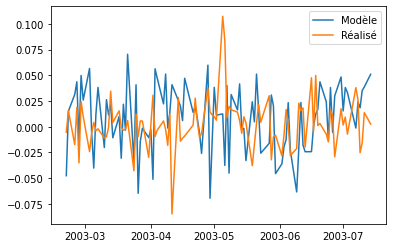

In [333]:
#plt.figure(figsize=(50,10))
plt.plot(pd.Series(r, index = R_aapl.index).iloc[5600:5700],label='Modèle')
plt.plot(R_aapl.iloc[5600:5700],label='Réalisé')
plt.legend()
plt.show()

* J'ai pris $\beta$ plus petit pour jouer sur l'autocorrélation (réduire $\sigma_v$ marche aussi)
* J'ai pris $\alpha$ comme dans Majewski mais $\beta$ comme dans Gao
